{'custom_intercept': 55914.420345335995, 'custom_coef': [6241.059605638906], 'custom_mse': 1029315408.7002745, 'custom_r2': 0.6243292578231356, 'sk_intercept': 55961.6702606737, 'sk_coef': [6237.729168221956], 'sk_mse': 1029193114.6955096, 'sk_r2': 0.6243738916439698}


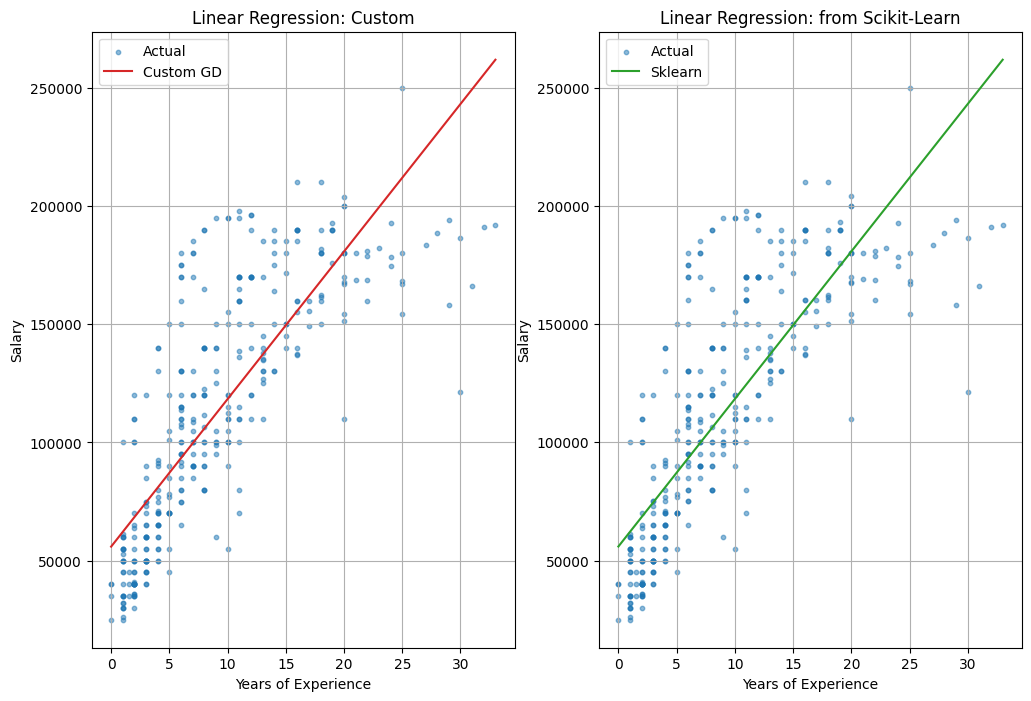

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from src.linear_regression_model import LinearRegressionGD
import matplotlib.pyplot as plt

# Load processed dataset
processed_path = '../data/processed/processed_salary_data.csv'
df = pd.read_csv(processed_path)

# Feature(s) and target
X = df[["Years of Experience"]].values

y = df["Salary"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Custom model
custom = LinearRegressionGD(learning_rate=0.005, epochs=2000, fit_intercept=True, random_state=42)
custom.fit(X_train, y_train)
y_pred_custom = custom.predict(X_test)

# Sklearn model
sk = LinearRegression()
sk.fit(X_train, y_train)
y_pred_sk = sk.predict(X_test)

# Metrics
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print({
    "custom_intercept": custom.intercept_,
    "custom_coef": custom.coef_.tolist(),
    "custom_mse": mse_custom,
    "custom_r2": r2_custom,
    "sk_intercept": float(sk.intercept_),
    "sk_coef": sk.coef_.tolist(),
    "sk_mse": mse_sk,
    "sk_r2": r2_sk,
})

# Sort for nice lines
order = np.argsort(X_test.reshape(-1))
X_sorted = X_test.reshape(-1)[order].reshape(-1, 1)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, s=10, alpha=0.5, label='Actual')
plt.plot(X_sorted, custom.predict(X_sorted), label='Custom GD', color='tab:red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Custom')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, s=10, alpha=0.5, label='Actual')
plt.plot(X_sorted, sk.predict(X_sorted), label='Sklearn', color='tab:green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: from Scikit-Learn')
plt.legend()
plt.grid(True)
plt.show()
